In [ ]:
from datetime import datetime as dt
from os import listdir
import pandas as pd
import numpy as np

print(f'74 paskaita. Orų prognozės.')

csv_dir="../../../duomenys/lhmt/"; # print(listdir(csv_dir))
csv_files=['2025-01-01_Vilniaus_AMS.csv', '2025-01-02_Vilniaus_AMS.csv', '2025-01-03_Vilniaus_AMS.csv', '2025-01-04_Vilniaus_AMS.csv']

# csv_miestai=['2025-01-05_Alytaus_AMS.csv','2025-01-05_Anykščių_AMS.csv','2025-01-05_Druskininkų_AMS.csv','2025-01-05_Kauno_AMS.csv','2025-01-05_Kybartų_AMS.csv','2025-01-05_Panevėžio_AMS.csv','2025-01-05_Raseinių_AMS.csv','2025-01-05_Švenčionių_AMS.csv','2025-01-05_Vilniaus_AMS.csv']

# Duomenų šaltiniai:
# https://archyvas.meteo.lt/?station=vilniaus-ams&start_date=2025-01-01&end_date=2025-01-01&meteo-form=Rodyti
# https://api.meteo.lt/

print('Pasiruošta',dt.now().replace(microsecond=0))

74 paskaita. Orų prognozės.
Pasiruošta 2025-01-06 22:03:41


In [2]:
print(listdir(csv_dir))

['2025-01-01_Vilniaus_AMS.csv', '2025-01-02_Vilniaus_AMS.csv', '2025-01-03_Vilniaus_AMS.csv', '2025-01-04_Vilniaus_AMS.csv', '2025-01-05_Alytaus_AMS.csv', '2025-01-05_Anykščių_AMS.csv', '2025-01-05_Druskininkų_AMS.csv', '2025-01-05_Kaunas.csv', '2025-01-05_Kauno_AMS.csv', '2025-01-05_Kybartai.csv', '2025-01-05_Kybartų_AMS.csv', '2025-01-05_Panevėžio_AMS.csv', '2025-01-05_Raseinių_AMS.csv', '2025-01-05_Vilniaus_AMS.csv', '2025-01-05_Vilnius.csv', '2025-01-05_Vilnius.json', '2025-01-05_Švenčionių_AMS.csv']


In [3]:
final_df = pd.DataFrame()

for file in csv_files:
    print(f'{csv_dir}{file}')
    day_df = pd.read_csv(f'{csv_dir}{file}')
    day_df['datetime'] = pd.to_datetime(day_df['obs_time_utc'])
    day_df['hour'] = day_df['datetime'].dt.hour
    day_df['cos_hour'] = np.cos(2 * np.pi * day_df['hour'] % 24 / 24)
    
    day_df = day_df[['hour', 'cos_hour', 'air_temperature']]  # Pasirenkame reikiamus stulpelius # 'datetime', 
    final_df = pd.concat([final_df, day_df], ignore_index=True)

../../../duomenys/lhmt/2025-01-01_Vilniaus_AMS.csv
../../../duomenys/lhmt/2025-01-02_Vilniaus_AMS.csv
../../../duomenys/lhmt/2025-01-03_Vilniaus_AMS.csv
../../../duomenys/lhmt/2025-01-04_Vilniaus_AMS.csv


In [4]:
day_df.head()

,hour,cos_hour,air_temperature
0,0,1.000000,-2.3
1,1,0.965926,-2.4
2,2,0.866025,-2.5
3,3,0.707107,-2.0
4,4,0.998886,-2.6


In [5]:
print(final_df)

    hour  cos_hour  air_temperature
0      0  1.000000              2.9
1      1  0.965926              2.0
2      2  0.866025              1.6
3      3  0.707107              1.8
4      4  0.998886              1.6
..   ...       ...              ...
91    19  0.561840             -3.7
92    20  0.972284             -3.8
93    21  0.878641             -4.8
94    22  0.725121             -4.9
95    23  0.999771             -5.5

[96 rows x 3 columns]


In [6]:
X = final_df.drop(columns=['air_temperature'])  # Nepriklausomi kintamieji
y = final_df['air_temperature']  # Priklausomasis kintamasis


In [7]:
# pip install scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Duomenų padalijimas į treniravimo ir testavimo rinkinius
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X, y

# Tiesinės regresijos modelis
model = LinearRegression()
model.fit( X_train, y_train )

# Prognozės ir modelio tikslumo įvertinimas
# y_pred = model.predict(X_test)
# print("MSE:", mean_squared_error(y_test, y_pred))

LinearRegression()

In [16]:
hours = np.arange(24)  # 24 valandos
df = pd.DataFrame({'hour': hours})
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] % 24 / 24)
y_predict = model.predict(df)

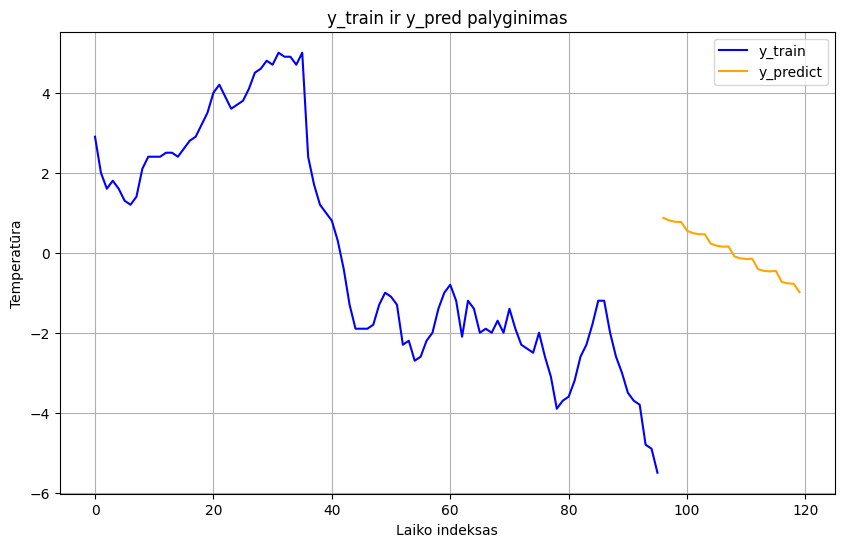

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Nubraižome grafiką
plt.figure(figsize=(10, 6))

# y_train - mėlyna spalva
plt.plot(range(len(y_train)), y_train, label="y_train", color="blue")

# y_pred - oranžinė spalva (prasideda po y_train)
plt.plot(range(len(y_train), len(y_train) + len(y_predict)), y_predict, label="y_predict", color="orange")

plt.xlabel("Laiko indeksas")
plt.ylabel("Temperatūra")
plt.title("y_train ir y_pred palyginimas")
plt.legend()
plt.grid(True)
plt.show()